In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Loading Data

In [85]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
print(iris.feature_names)
print(iris.target_names)
print(iris.DESCR)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high

# Pre-processing

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Number of Training Instances: {len(X_train)}")
print(f"Number of Testing Instances: {len(X_test)}")
print(X_train)

Number of Training Instances: 105
Number of Testing Instances: 45
[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [4.9 3.1 1.5 0.2]
 [5.8 2.8 5.1 2.4]
 [5.  3.4 1.5 0.2]
 [5.  3.5 1.6 0.6]
 [5.9 3.2 4.8 1.8]
 [5.1 2.5 3.  1.1]
 [6.9 3.2 5.7 2.3]
 [6.  2.7 5.1 1.6]
 [6.1 2.6 5.6 1.4]
 [7

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[1:10])

[[ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]
 [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
 [ 1.63643991  1.41631528  1.30142668  1.70589097]
 [-0.17225683 -0.26270364  0.19235097  0.08245999]
 [ 2.11875905 -0.02284379  1.59328871  1.16474731]
 [-0.29283662 -0.02284379  0.36746819  0.35303182]
 [-0.89573553  1.17645543 -1.44207638 -1.40568508]
 [ 2.23933883 -0.50256349  1.65166111  1.0294614 ]]


In [88]:
pca = PCA(n_components=2)  # reducing to 2 components for demonstration
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca[1:10])

[[ 1.02089353  0.2868919 ]
 [ 1.30901605 -0.4462446 ]
 [ 0.79808905 -0.28197733]
 [ 2.32801516 -1.92787447]
 [ 0.12204483  0.30252985]
 [ 2.73971652 -0.7019761 ]
 [ 0.26711128  0.10596419]
 [-2.37022192 -0.77547024]
 [ 2.85834975 -0.28233063]]


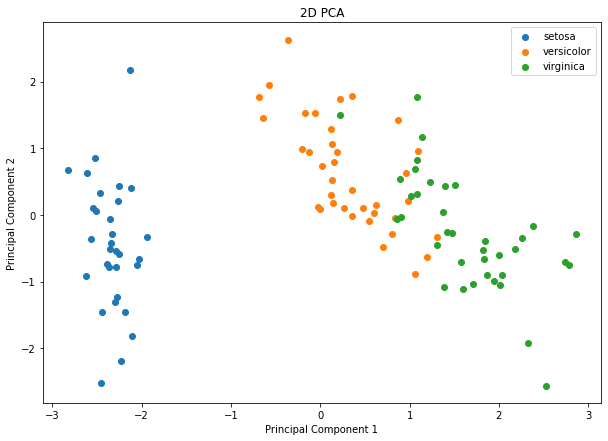

In [89]:
plt.figure(figsize=(10, 7))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('2D PCA')
plt.show()

# Creating Models

In [90]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [91]:
y_pred_rf = rf.predict(X_test_pca)

In [92]:
print(f"RF Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

RF Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



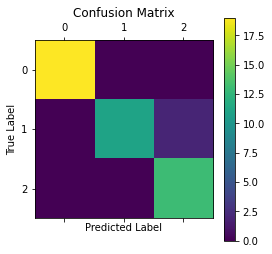

In [93]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [94]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

In [95]:
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

